In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl


In [2]:
df_DEP = pd.read_excel('DepthDEP__Bcores.xlsx', sheet_name=None, index = False)

In [3]:
coreNames = list(df_DEP.keys())

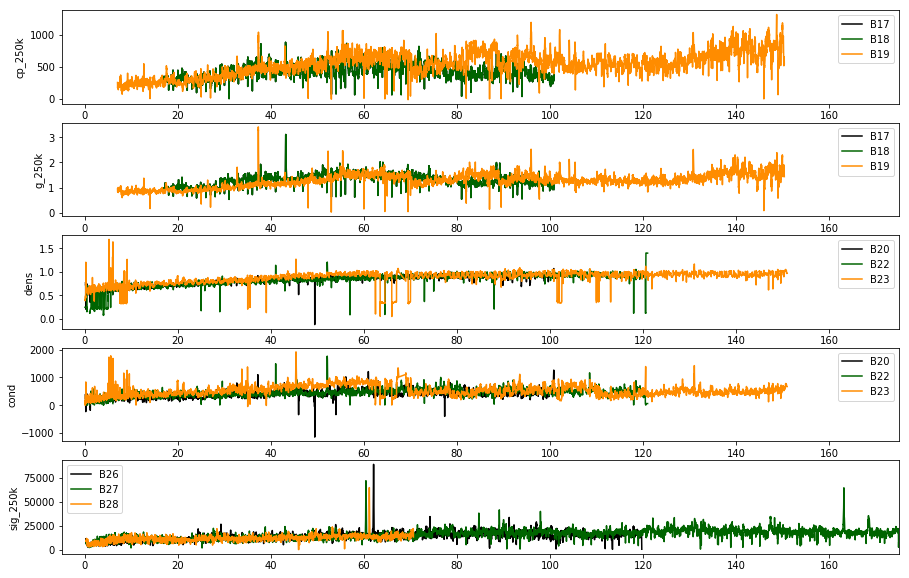

In [4]:
figDEP, axDEP = plt.subplots(5,figsize=(15,10))
DEP_Names = ['cp_250k','g_250k','dens','cond','sig_250k']
colors = ['k','darkgreen','darkorange']

for i in range(3):
    axDEP[0].plot(df_DEP[coreNames[i]]['depth'],df_DEP[coreNames[i]]['cp_250k'], label=coreNames[i], color=colors[i])
    axDEP[1].plot(df_DEP[coreNames[i]]['depth'],df_DEP[coreNames[i]]['g_250k'], label=coreNames[i], color=colors[i])

for i in range(3,6):
    axDEP[2].plot(df_DEP[coreNames[i]]['depth'],df_DEP[coreNames[i]]['dens'], label=coreNames[i], color=colors[i-3])
    axDEP[3].plot(df_DEP[coreNames[i]]['depth'],df_DEP[coreNames[i]]['cond'], label=coreNames[i], color=colors[i-3])
    
for i in range(6,9):
    axDEP[4].plot(df_DEP[coreNames[i]]['depth'],df_DEP[coreNames[i]]['sig_250k'], label=coreNames[i], color=colors[i-6])

for i in range(5):
    axDEP[i].set(ylabel=DEP_Names[i], xlim = (-5,175))
    axDEP[i].legend()

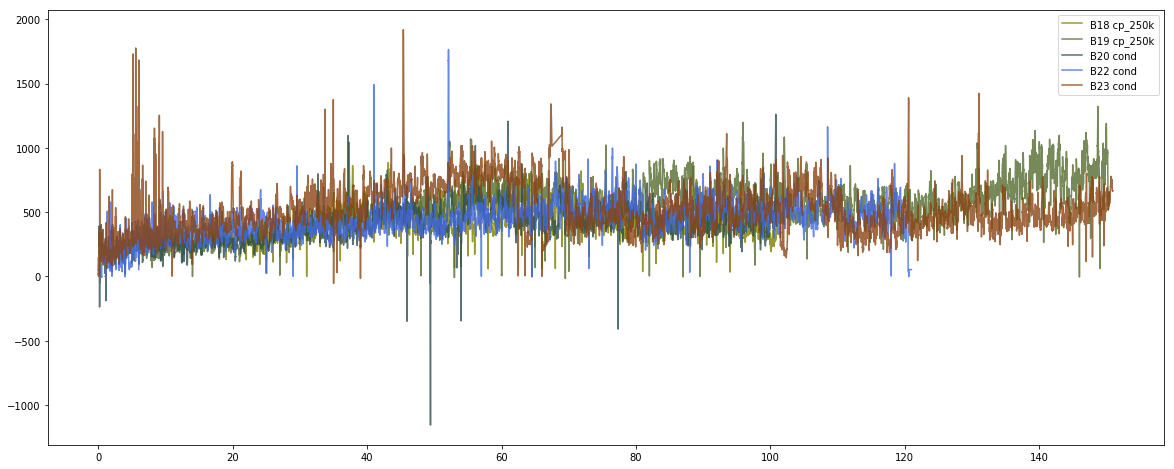

In [5]:
coreNames_New = ['B18','B19','B20','B22','B23']
labs = ['cp_250k', 'cp_250k','cond','cond','cond']
colors = ['olive','darkolivegreen','darkslategrey','royalblue','saddlebrown']
fig, ax = plt.subplots(figsize=(20,8))

for i in range(len(coreNames_New)):
    ax.plot(df_DEP[coreNames_New[i]]['depth'], df_DEP[coreNames_New[i]][labs[i]], alpha=0.8, color=colors[i], label = coreNames_New[i] + ' ' + labs[i])
ax.legend()

In [6]:
path = "../Data/datasets/B_cores_AWI/"
filename = "chemistry_conductivity_NGT93_95_all.xlsx"

B_Cores_chem_cond__data = pd.read_excel(path + filename, sheet_name=None)

headers = list(B_Cores_chem_cond__data.keys())

df_B18_DEP = B_Cores_chem_cond__data[headers[4]]
df_B19_DEP = B_Cores_chem_cond__data[headers[6]]
df_B20_DEP = B_Cores_chem_cond__data[headers[7]]
df_B22_DEP = B_Cores_chem_cond__data[headers[10]]
df_B23_DEP = B_Cores_chem_cond__data[headers[11]]

In [8]:

coreNames_DEP = ['B18', 'B19', 'B20', 'B22', 'B23']

f_DEP_save = 'DepthDEP__BcoresClean.xlsx'
writer = pd.ExcelWriter(f_DEP_save, engine='xlsxwriter')
writer.save()

df18_DEP = pd.DataFrame({'depth': df_B18_DEP[df_B18_DEP.keys()[4]], 'cond': df_B18_DEP[df_B18_DEP.keys()[6]]})
writer = pd.ExcelWriter(f_DEP_save, engine='openpyxl')
df18_DEP.to_excel(writer, sheet_name=coreNames_DEP[0], index=False)
writer.save()

df19_DEP = pd.DataFrame({'depth': df_B19_DEP[df_B19_DEP.keys()[0]], 'cond': df_B19_DEP[df_B19_DEP.keys()[2]]})
df20_DEP = pd.DataFrame({'depth': df_B20_DEP[df_B20_DEP.keys()[0]], 'cond': df_B20_DEP[df_B20_DEP.keys()[2]]})
df22_DEP = pd.DataFrame({'depth': df_B22_DEP[df_B22_DEP.keys()[0]], 'cond': df_B22_DEP[df_B22_DEP.keys()[2]]})
df23_DEP = pd.DataFrame({'depth': df_B23_DEP[df_B23_DEP.keys()[0]], 'cond': df_B23_DEP[df_B23_DEP.keys()[2]]})


with pd.ExcelWriter(f_DEP_save, engine='openpyxl', mode='a') as writer:
    df19_DEP.to_excel(writer, sheet_name=coreNames_DEP[1], index=False)
    df20_DEP.to_excel(writer, sheet_name=coreNames_DEP[2], index=False)
    df22_DEP.to_excel(writer, sheet_name=coreNames_DEP[3], index=False)
    df23_DEP.to_excel(writer, sheet_name=coreNames_DEP[4], index=False)
